In [1]:
import numpy as np 
import matplotlib as plt
import collections

import networkx as nx #pip install networkx
from numpy.linalg import eig

import nltk
from nltk.tokenize import sent_tokenize , word_tokenize

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import glob
import re
import os
import sys

from collections import defaultdict
from collections import deque

stwords = set(stopwords.words('english'))

web_graph = nx.read_gpickle("web_graph.gpickle")
G=web_graph

In [2]:
def editDist(word1, word2):
    '''
    Finds the distance between two similar words.
    '''
    m=len(word1)
    n=len(word2)
    
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)]
 
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j    # Minimum possible operations for this case = j

            elif j == 0:
                dp[i][j] = i    # Minimum possible operations for this case = i
 
            elif word1[i-1] == word2[j-1]:
                dp[i][j] = dp[i-1][j-1]
 
            else:
                dp[i][j] = 1 + min(dp[i][j-1],        # Count Insert
                                   dp[i-1][j],        # Count Remove
                                   dp[i-1][j-1])      # Count Replace and find minimum
 
    return dp[m][n]

In [3]:
def getClosest(word):
    '''
    Function returns the closest word in the dictionary.
    '''
    dictionary = {}
    for w in ii.keys():
        dist=editDist(word,w)
        dictionary[w]=dist
        if dist == 1:
            return w
    v=(sorted(dictionary.items(), key=lambda item: item[1]))
    return v[0][0] 

In [4]:
def inverted_index_creation():
    inverted_index = defaultdict(set)

    #importing stopwords from nltk and making it into a set
    stwords = set(stopwords.words('english'))

    #importing the porterStemmer
    ps = PorterStemmer()

    def remove_special_characters(text):
        import re
        regex = re.compile('[^a-zA-Z0-9\s]')
        text_returned = re.sub(regex,'',text)
        return text_returned

    web_graph = nx.read_gpickle("web_graph.gpickle")
    G=web_graph

    for docId in range(len(G)):
        text=G.nodes[docId]['page_content']
        text=remove_special_characters(text)

        for sent in sent_tokenize(text):
            for word in word_tokenize(sent):
                word_lower = word.lower()
                if word_lower not in stwords:
                    #stemms the words
                    word_stem = ps.stem(word_lower)
                    inverted_index[word_stem].add(docId)
    return inverted_index

In [5]:
def print_hubs():
    print("Nodes(DocId)    Hub Score")
    for i in range(len(baseset)):
        print(str(baseset[i])+"            :"+str(hubs[0,i]))


In [6]:
def print_authorities():
    print("Nodes(DocId)    Authority Score")
    for i in range(len(baseset)):
        print(str(baseset[i])+"            :"+str(authorities[0,i]))

In [7]:
node_index= 0
G.nodes[node_index]['page_content']

"Business: Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."

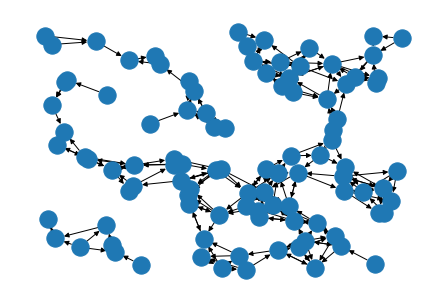

In [8]:
pos={i:web_graph.nodes[i]['pos'] for i in range(len(web_graph.nodes))}

nx.draw(web_graph,pos)

In [9]:
ii=inverted_index_creation()

In [43]:
rootset=[]
baseset=[]

query = input('Enter your query:')
    
query = query.lower()
query_tokens=query.split()
query_words=[]

q = deque()

ps=PorterStemmer()

for word in query_tokens:
    word=word.lower()
    if word not in stwords:
        word=ps.stem(word)
        query_words.append(word)

for word in query_words:
    if word in ii.keys():
        set_a=ii[word]
        set_contains=(set(set_a)) #typecasting to set
        q.append(set_contains)

    else:
        cword=getClosest(word)
        set_a=ii[cword]
        set_contains=(set(set_a))
        q.append(set_contains)
        continue

n=len(query_words)

for i in range(n-1):
    set_a = q.pop()
    set_b = q.pop()
    unioned=set(set_a).union(set(set_b))
    q.appendleft(unioned)

rootset=list(collections.deque(q[0]))

Enter your query:apple juice in India


In [44]:
baseset=rootset.copy()
baseset=list(set(baseset))
rootset=list(set(rootset))

In [45]:
for i in range(len(rootset)):
    ind=rootset[i]
    in_edges=list(G.in_edges(ind))
    out_edges=list(G.out_edges(ind))
    len_in_edges=len(in_edges)
    len_out_edges=len(out_edges)
    for j in range(len_in_edges):
        temp=in_edges[j][0]
        if temp not in baseset: 
            baseset.append(temp)
    for j in range(len_out_edges):
        temp=out_edges[j][1]
        if temp not in baseset: 
            baseset.append(temp)

In [46]:
for i in range(len(rootset)):
    ind=rootset[i]
    in_edges=list(G.in_edges(ind))
    out_edges=list(G.out_edges(ind))
    print(ind)
    print(in_edges)
    print(out_edges)
    len_in_edges=len(in_edges)
    len_out_edges=len(out_edges)
    for j in range(len_in_edges):
        temp=in_edges[j][0]
        if temp not in baseset: 
            baseset.append(temp)
    for j in range(len_out_edges):
        temp=out_edges[j][1]
        if temp not in baseset: 
            baseset.append(temp)

35
[]
[(35, 42), (35, 44), (35, 81)]
36
[(6, 36), (14, 36), (29, 36)]
[(36, 93)]
71
[(18, 71), (80, 71), (99, 71)]
[(71, 18), (71, 34), (71, 68), (71, 80), (71, 95)]
10
[(3, 10)]
[(10, 0), (10, 61), (10, 75)]
88
[(16, 88), (60, 88)]
[(88, 27), (88, 57)]


In [47]:
# baseset=np.array(baseset)
# baseset=np.unique(baseset)
print(baseset)

[35, 36, 71, 10, 88, 42, 44, 81, 6, 14, 29, 93, 18, 80, 99, 34, 68, 95, 3, 0, 61, 75, 16, 60, 27, 57]


In [48]:
sub_graph=web_graph.subgraph(baseset)

In [49]:
n=len(sub_graph.nodes)
A=nx.adjacency_matrix(sub_graph).todense()
#print(A.todense())
AT=A.transpose()
#print(AT.todense())
# a=np.ones(n)
# h=np.ones(n)
# x=np.zeros((n,n))
# print(A)
# print()
# print(AT)
# print()

In [50]:
X = A@A.T
W,VL= eig(X)
h=eig(X)[1][:,np.argmax(W)]
h = h/sum(h)
#w,v=eig(a)
#print(v[:,1]
hubs=h.T
print(hubs)

[[ 8.49697297e-02  0.00000000e+00  6.41787302e-18  1.04951279e-01
  -4.25541962e-17  2.30269255e-18  2.11712834e-01  0.00000000e+00
  -1.02786020e-17  0.00000000e+00 -4.90334493e-35 -8.13214278e-18
   0.00000000e+00 -9.23025521e-36  0.00000000e+00  5.62709044e-19
   5.50483521e-02  9.53561067e-02  2.89136489e-01  4.46619752e-02
   6.20431569e-02  0.00000000e+00  1.32327106e-19 -1.01406577e-17
   0.00000000e+00  5.21200774e-02]]


In [51]:
Y =A.T@A
w, vl= eig(Y)
a=eig(Y)[1][:,0]
a= a/sum(a)
#w,v=eig(a)
#print(v[:,1]
authorities=a.T
print(authorities)

[[ 5.01797059e-02-0.j  4.34779717e-02-0.j -0.00000000e+00-0.j
  -0.00000000e+00-0.j -5.30015877e-17-0.j -0.00000000e+00-0.j
   1.15438262e-01-0.j  3.74058266e-18-0.j -6.76249768e-17-0.j
   1.99964992e-01-0.j -0.00000000e+00-0.j -6.76251521e-17-0.j
   5.37363957e-18-0.j  4.48418809e-18-0.j  1.95608224e-17-0.j
  -0.00000000e+00-0.j  1.34706435e-01-0.j  9.69752584e-02-0.j
   1.09297571e-01-0.j  3.52002524e-02-0.j  9.69752584e-02-0.j
   1.73029568e-17-0.j  8.06786318e-17-0.j -2.82348331e-17-0.j
   9.69752584e-02-0.j  2.08090345e-02-0.j]]


In [52]:
baseset=list(set(baseset))
rootset=list(set(rootset))
print(rootset)
print(baseset)


[35, 36, 71, 10, 88]
[0, 3, 6, 10, 14, 16, 18, 27, 29, 34, 35, 36, 42, 44, 57, 60, 61, 68, 71, 75, 80, 81, 88, 93, 95, 99]


In [53]:
nx.hits(sub_graph)

({0: 0.08496972974997748,
  3: -2.48823706656487e-18,
  6: -4.294165692709641e-16,
  10: 0.10495127885440028,
  14: -4.570724191381217e-16,
  16: -1.0921420869574109e-17,
  18: 0.21171283417158435,
  27: 0.0,
  29: -1.7789748052976506e-16,
  34: 0.0,
  35: -1.2769119270648845e-17,
  36: -9.631855110456128e-17,
  42: 0.0,
  44: -5.099524131408936e-18,
  57: 0.0,
  60: -2.321686916088222e-17,
  61: 0.055048352095537025,
  68: 0.09535610668616792,
  71: 0.2891364889209275,
  75: 0.04466197515934657,
  80: 0.062043156943277826,
  81: 0.0,
  88: -1.9112759822591416e-17,
  93: -1.828563875037954e-16,
  95: 0.0,
  99: 0.05212007741878232},
 {0: 0.050179705859772855,
  3: 0.04347797168994846,
  6: 0.0,
  10: -5.217917568941808e-18,
  14: -1.4398801461963113e-16,
  16: 0.0,
  18: 0.1154382624550894,
  27: -1.429613363213089e-17,
  29: -3.834560499761812e-16,
  34: 0.19996499170818588,
  35: 0.0,
  36: -3.730570537670849e-16,
  42: -1.069387516007719e-17,
  44: -8.041700640477797e-18,
  57: -2.5

In [ ]:
print_hubs()
print()
print_authorities()

In [ ]:
list(set(baseset))